## Importing

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import load_digits 
from sklearn.linear_model import LinearRegression

In [2]:
digit = load_digits()

## Save X and y as Dataframes

In [3]:
X = digit.data
y = digit.target

In [4]:
X.shape,y.shape

((1797, 64), (1797,))

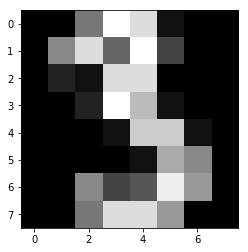

In [5]:
plt.imshow(X[3].reshape(8,8),cmap=plt.cm.gray)

## Split the data into training and Dataset

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## using Logistic Regression

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [8]:
pred = model.predict(X_test)
result = pd.DataFrame({"Predicted":predict,"Actual":y_test})
result

,Predicted,Actual
0,6,6
1,9,9
2,3,3
3,7,7
4,2,2
5,1,1
6,5,5
7,2,2
8,5,5
9,2,2


## Classification Accuracy

In [9]:
kfold = model_selection.KFold(n_splits=10, random_state=7)

In [10]:
resultA = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

In [11]:
resultA

array([0.95555556, 0.96296296, 0.95555556, 0.96296296, 0.94814815,
       0.97037037, 0.94074074, 0.95522388, 0.91791045, 0.94776119])

In [12]:
resultA.sum()/10

0.9517191818684356

In [13]:
print("Accuracy %.3f"%(resultA.mean()*100))

Accuracy 95.172


## Logarithmic loss

In [14]:
resultNL = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_log_loss')
print(resultNL.mean()*100)

-25.394211462567785


In [15]:
predicted=model.predict(X_test)

## R2 matrix

In [16]:
regres=LinearRegression()
result=model_selection.cross_val_score(regres,X,y,cv=kfold,scoring='r2')

In [17]:
result

array([0.40105499, 0.63102463, 0.57072313, 0.59629035, 0.54519634,
       0.67174215, 0.61763556, 0.47611004, 0.4236549 , 0.41044286])

## Mean Absolute Error

In [18]:
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')

In [19]:
print("result%.3f(%.3f))"%(results.mean(),results.std()))

result-0.202(0.068))


## Mean Squared error

In [20]:
resMSQ = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
print(resMSQ.mean()*100)

-111.9192924267551


## Confusion Matrix

In [21]:
matrix=confusion_matrix(y_test,predicted)
matrix

array([[42,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  1,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 54,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 56,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0,  1, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  1],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  3, 45]], dtype=int64)

## Classification Report

In [22]:
report1=classification_report(y_test,predicted)

In [23]:
report1

'             precision    recall  f1-score   support\n\n          0       1.00      0.98      0.99        43\n          1       0.95      0.97      0.96        37\n          2       0.97      1.00      0.99        38\n          3       1.00      0.96      0.98        46\n          4       0.98      0.98      0.98        55\n          5       0.95      0.95      0.95        59\n          6       1.00      0.98      0.99        45\n          7       1.00      0.98      0.99        41\n          8       0.86      0.95      0.90        38\n          9       0.96      0.94      0.95        48\n\navg / total       0.97      0.97      0.97       450\n'